<a href="https://colab.research.google.com/github/chiranjeevi-manike/Stock-Price-Prediction/blob/master/Stock_Price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
data = yf.download('GOOGL', start = '2018-01-01', end = '2020-12-20', progress = True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1053.020020,1075.979980,1053.020020,1073.209961,1073.209961,1588300
2018-01-03,1073.930054,1096.099976,1073.430054,1091.520020,1091.520020,1565900
2018-01-04,1097.089966,1104.079956,1094.260010,1095.760010,1095.760010,1302600
2018-01-05,1103.449951,1113.579956,1101.800049,1110.290039,1110.290039,1512500
2018-01-08,1111.000000,1119.160034,1110.000000,1114.209961,1114.209961,1232200


In [ ]:
data.to_csv('google.csv',index = True)

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [ ]:
df_final = pd.read_csv("google.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [ ]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1053.020020,1075.979980,1053.020020,1073.209961,1073.209961,1588300
2018-01-03,1073.930054,1096.099976,1073.430054,1091.520020,1091.520020,1565900
2018-01-04,1097.089966,1104.079956,1094.260010,1095.760010,1095.760010,1302600
2018-01-05,1103.449951,1113.579956,1101.800049,1110.290039,1110.290039,1512500
2018-01-08,1111.000000,1119.160034,1110.000000,1114.209961,1114.209961,1232200


In [ ]:
df_final.shape

(748, 6)

In [ ]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,748.000000,748.000000,748.000000,748.000000,748.000000,7.480000e+02
mean,1258.840949,1272.454584,1245.450149,1259.447981,1259.447981,1.860247e+06
std,188.997360,190.924935,187.844497,189.343068,189.343068,8.694324e+05
min,984.320007,1012.119995,977.659973,984.669983,984.669983,6.401000e+05
25%,1115.282471,1127.665039,1105.225006,1116.339996,1116.339996,1.303950e+06
50%,1199.994995,1209.164978,1190.200012,1201.830017,1201.830017,1.644500e+06
75%,1378.047516,1398.079987,1354.399963,1384.549988,1384.549988,2.125475e+06
max,1820.540039,1843.829956,1817.000000,1824.969971,1824.969971,6.658900e+06


In [ ]:
df_final.isnull().values.any()

False

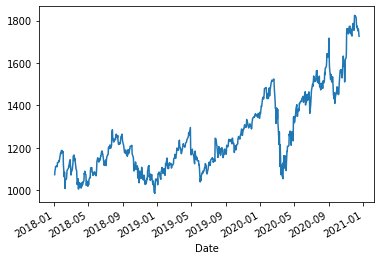

In [ ]:
df_final['Adj Close'].plot()

In [ ]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

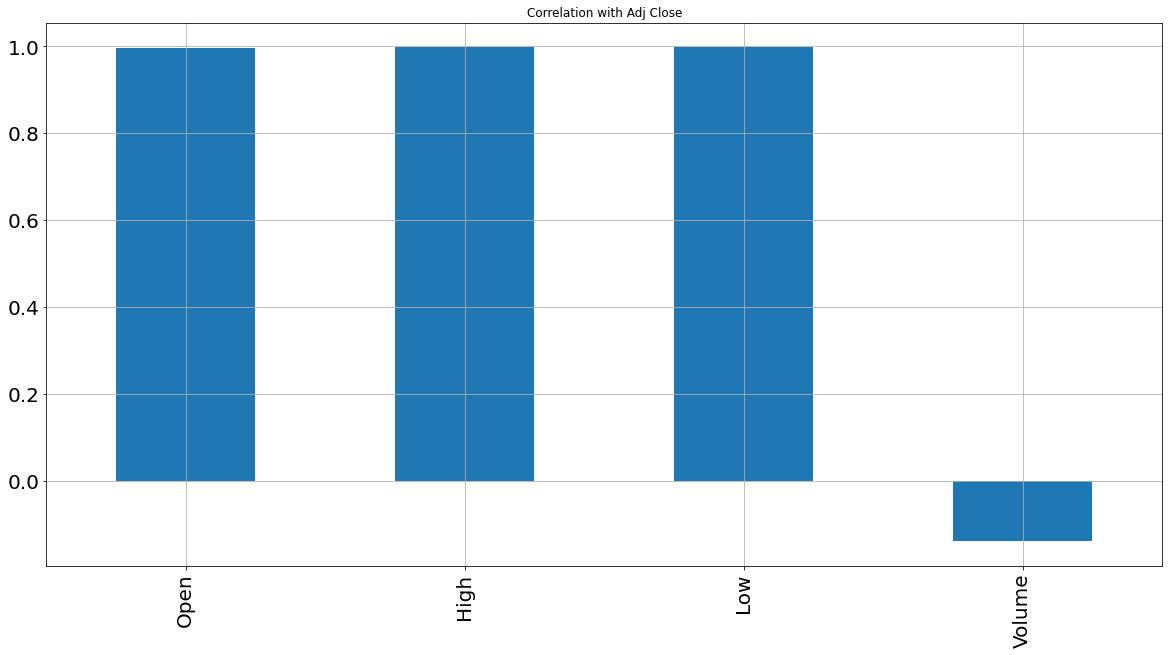

In [ ]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [ ]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1053.020020,1075.979980,1053.020020,1073.209961,1073.209961,1588300
2018-01-03,1073.930054,1096.099976,1073.430054,1091.520020,1091.520020,1565900
2018-01-04,1097.089966,1104.079956,1094.260010,1095.760010,1095.760010,1302600
2018-01-05,1103.449951,1113.579956,1101.800049,1110.290039,1110.290039,1512500
2018-01-08,1111.000000,1119.160034,1110.000000,1114.209961,1114.209961,1232200


In [ ]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2018-01-02,0.082155,0.076782,0.089785,0.157540
2018-01-03,0.107161,0.100973,0.114102,0.153818
2018-01-04,0.134857,0.110567,0.138919,0.110072
2018-01-05,0.142462,0.121990,0.147902,0.144946
2018-01-08,0.151491,0.128699,0.157672,0.098375


In [ ]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2018-01-02,0.082155,0.076782,0.089785,0.157540
2018-01-03,0.107161,0.100973,0.114102,0.153818
2018-01-04,0.134857,0.110567,0.138919,0.110072
2018-01-05,0.142462,0.121990,0.147902,0.144946
2018-01-08,0.151491,0.128699,0.157672,0.098375


Shape of features :  (748, 4)
Shape of target :  (748, 1)


,Open,High,Low,Volume
Date,,,,
2020-12-11,0.927603,0.920020,0.923440,0.048398
2020-12-14,0.940422,0.935038,0.919139,0.168206
2020-12-15,0.927435,0.904017,0.910251,0.071144
2020-12-16,0.938497,0.910161,0.919056,0.098641
2020-12-17,0.932303,0.907275,0.897717,0.183409


,Adj Close
Date,
2020-12-11,1752.260010
2020-12-14,1761.079956
2020-12-15,1757.189941
2020-12-16,1740.510010
2020-12-17,1726.219971



 -----After process------ 

Shape of features :  (658, 4)
Shape of target :  (658, 1)


,Adj Close
Date,
2020-08-06,1498.369995
2020-08-07,1496.819946
2020-08-10,1480.540039
2020-08-11,1507.239990
2020-08-12,1516.650024


In [ ]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
X_train.shape

(599, 4)

In [ ]:
X_test.shape

(59, 4)

In [ ]:
y_train.shape

(599,)

In [ ]:
y_test.shape

(59,)

In [ ]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  179.37775892045687
R2 score:  -1.1551676470239247


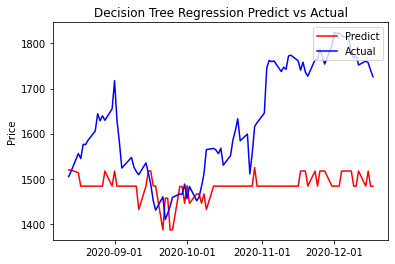

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

In [ ]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
75/75 [==============================] - 2s 2ms/step - loss: 1290965.6316
Epoch 2/200
75/75 [==============================] - 0s 2ms/step - loss: 1290577.2089
Epoch 3/200
75/75 [==============================] - 0s 2ms/step - loss: 1289892.6711
Epoch 4/200
75/75 [==============================] - 0s 2ms/step - loss: 1288697.4901
Epoch 5/200
75/75 [==============================] - 0s 2ms/step - loss: 1286809.6990
Epoch 6/200
75/75 [==============================] - 0s 2ms/step - loss: 1284094.8701
Epoch 7/200
75/75 [==============================] - 0s 2ms/step - loss: 1280483.3684
Epoch 8/200
75/75 [==============================] - 0s 2ms/step - loss: 1275967.0888
Epoch 9/200
75/75 [==============================] - 0s 2ms/step - loss: 1270582.9737
Epoch 10/200
75/75 [==============================] - 0s 2ms/step - loss: 1264392.6365
Epoch 11/200
75/75 [==============================] - 0s 2ms/step - loss: 1257467.8355
Epoch 12/200
75/75 [==============================] 

In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.011
The R2 score on the Test set is:	-16.760


In [ ]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

59/59 [==============================] - 0s 786us/step - loss: 39024.7461


In [ ]:
print('LSTM: %f'%score_lstm)

LSTM: 39024.746094


In [ ]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

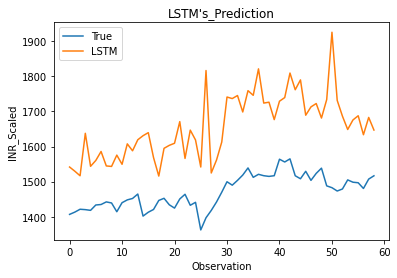

In [ ]:

plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [ ]:
col1 = pd.DataFrame(y_test, columns=['True'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_excel('PredictionResults_LSTM_NonShift.xlsx')